## Setting up

In [65]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv.

For an analysis of app names, we can focus on just the first data set. The second data set gives us reviews of each app, which is not needed for this project.

In [67]:
df = pd.read_csv("gpsa/googleplaystore.csv")

In [68]:
# Show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [69]:
# Remove any duplicate applications
df.drop_duplicates(['App'], inplace = True)

In [70]:
# We decided that we only need the app names, ratings, number of installations, and category. 
df = df[['App', 'Rating', 'Installs','Category']]

The 'size' of apps, the 'type' (either free or paid), 'price', 'content rating' (as in rating for suggested age group), the date of when they were 'last updated', and the versions ('current ver' and 'android ver') have little to do with our analysis of title length, so those columns were dropped. We also decided to drop the 'genre' column since it is a less reliable variant of the 'category' column; apps can only belong in one category, but they can belong in multiple genres.

In [71]:
# Count amount of missing values in the dataset
app_nans = df['App'].isna().sum()
rating_nans = df['Rating'].isna().sum()
installs_nans = df['Installs'].isna().sum()
category_nans = df['Category'].isna().sum()
print(app_nans, rating_nans, installs_nans, category_nans)

0 1463 0 0


In [72]:
# The only column in our current dataset that has missing values is 'Ratings'.
# Since we absolutely need ratings values for every observation we have, we will drop all of the rows without them.
df = df.dropna()

In [73]:
# Preview the dataframe
df.head

<bound method NDFrame.head of                                                      App  Rating     Installs  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1      10,000+   
1                                    Coloring book moana     3.9     500,000+   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   5,000,000+   
...                                                  ...     ...          ...   
10837                   Fr. Mike Schmitz Audio Teachings     5.0         100+   
10839                      The SCP Foundation DB fr nn5n     4.5       1,000+   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  10,000,000+   

                  Category  
0           ART_AND_DESIGN  
1           ART_AND_DESIGN  
2           ART_AND_DESIGN  
...                    ...  
10837               FAMILY  
10839  BOOKS_AND_REFERENCE  
10840            LIFESTYLE  

[8197 rows x 4 columns]>

In [74]:
"""
#It turns out that the reviews (number of) column is a column of strings
#Every time the number of reviews is in the millions, it is denoted with 'M'
#We need to fix all occurences of this to properly typecast

#We replace the instances of 'M' in the original column with E6
df['Reviews'] = df['Reviews'].replace({'M': 'E6'}, regex=True)
"""

"\n#It turns out that the reviews (number of) column is a column of strings\n#Every time the number of reviews is in the millions, it is denoted with 'M'\n#We need to fix all occurences of this to properly typecast\n\n#We replace the instances of 'M' in the original column with E6\ndf['Reviews'] = df['Reviews'].replace({'M': 'E6'}, regex=True)\n"

In [75]:
# It turns out that the 'Installs' column is a column of strings instead of integers

# Delete the '+' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '')
# Delete the ',' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace(',', '')

# Type cast these strings into integers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df.head

<bound method NDFrame.head of                                                      App  Rating  Installs  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.00e+04   
1                                    Coloring book moana     3.9  5.00e+05   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  5.00e+06   
...                                                  ...     ...       ...   
10837                   Fr. Mike Schmitz Audio Teachings     5.0  1.00e+02   
10839                      The SCP Foundation DB fr nn5n     4.5  1.00e+03   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  1.00e+07   

                  Category  
0           ART_AND_DESIGN  
1           ART_AND_DESIGN  
2           ART_AND_DESIGN  
...                    ...  
10837               FAMILY  
10839  BOOKS_AND_REFERENCE  
10840            LIFESTYLE  

[8197 rows x 4 columns]>

In [76]:
#The E6 allows us to convert the column of strings into a column of floats since
        #E6 is evaluated as *1000000
    
#df['Reviews'] = df['Reviews'].astype(float)

In [77]:
# Create a word count column 
df['Word Count'] = df['App'].str.split().str.len()

# TODO - We drop everything outside 2 standard deviations (after histograms)

In [78]:
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [79]:
#preview table again
df.head

<bound method NDFrame.head of                                                      App  Rating  Installs  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.00e+04   
1                                    Coloring book moana     3.9  5.00e+05   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  5.00e+06   
...                                                  ...     ...       ...   
10837                   Fr. Mike Schmitz Audio Teachings     5.0  1.00e+02   
10839                      The SCP Foundation DB fr nn5n     4.5  1.00e+03   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  1.00e+07   

                  Category  Word Count  Char Count  
0           ART_AND_DESIGN           9          38  
1           ART_AND_DESIGN           3          17  
2           ART_AND_DESIGN          10          41  
...                    ...         ...         ...  
10837               FAMILY           5          28  
10839  BOOKS_AND_REFERENCE 

In [80]:
#A### the code below creates many columns with binary variable
#A### e.g. values in column 'a' are equal to 1 if 'a' is contained in apps name and 0 otherwise
#A### or values in column 'wq' are equal to 1 if 'wq' is contained in apps name and 0 otherwise

#A### Then we count how many ones are in each of the created columns to assess if the column is useful
#A### If there are not a lot of ones in a column (less than 0.025 * (# of rows) for example)
#A### or too many (more than 0.975 * (# of rows) for example) we remove such a column

#A### it is done because, for example there are not a lot of titles with 'wq' inside them
#A### so 'wq' column is not useful for our analysis

'''
import string
alphabet = list(string.ascii_lowercase)

for k in alphabet:
    q1 = []
    for i in df['App']:
        if k in i:
            q1.append(1)
        else:
            q1.append(0)
    df[k] = q1

alphabet1 = []
for i in alphabet:
    for k in alphabet:
        alphabet1.append(i + k)
        
for k in alphabet1:
    q2 = []
    for i in df['App']:
        if k in i:
            q2.append(1)
        else:
            q2.append(0)
    df[k] = q2


rem_list = []                           ##here 13 and 715 are indexes of first and last created columns  
for i in range(13,715):                 ##it is possible when you will try to execute code you will need to insert proper values 
    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:
        rem_list.append(i)


s = 0
for i in rem_list:
    i = i - s
    del df[df.columns[i]]
    s += 1
'''


"\nimport string\nalphabet = list(string.ascii_lowercase)\n\nfor k in alphabet:\n    q1 = []\n    for i in df['App']:\n        if k in i:\n            q1.append(1)\n        else:\n            q1.append(0)\n    df[k] = q1\n\nalphabet1 = []\nfor i in alphabet:\n    for k in alphabet:\n        alphabet1.append(i + k)\n        \nfor k in alphabet1:\n    q2 = []\n    for i in df['App']:\n        if k in i:\n            q2.append(1)\n        else:\n            q2.append(0)\n    df[k] = q2\n\n\nrem_list = []                           ##here 13 and 715 are indexes of first and last created columns  \nfor i in range(13,715):                 ##it is possible when you will try to execute code you will need to insert proper values \n    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:\n        rem_list.append(i)\n\n\ns = 0\nfor i in rem_list:\n    i = i - s\n    del df[df.columns[i]]\n    s += 1\n"

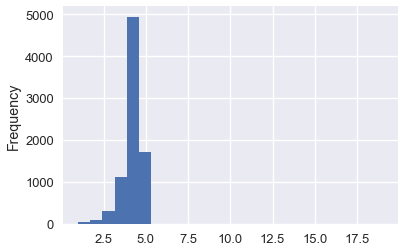

In [81]:
## YOUR CODE HERE
df['Rating'].plot.hist(bins = 25)
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

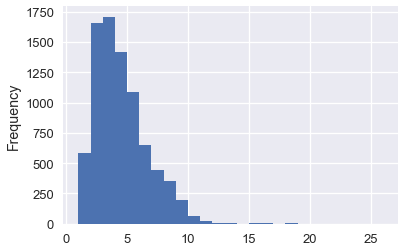

In [82]:
## YOUR CODE HERE
df['Word Count'].plot.hist(bins = 25)
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

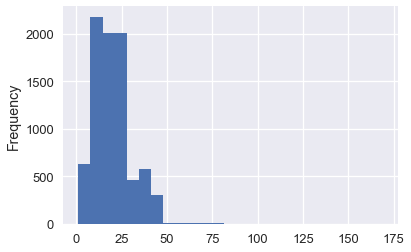

In [83]:
df['Char Count'].plot.hist(bins = 25)

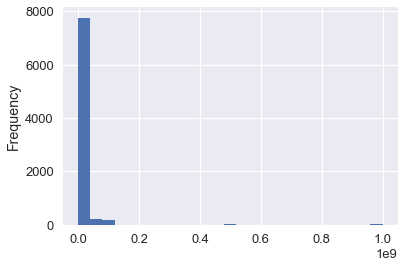

In [84]:
df['Installs'].plot.hist(bins = 25)

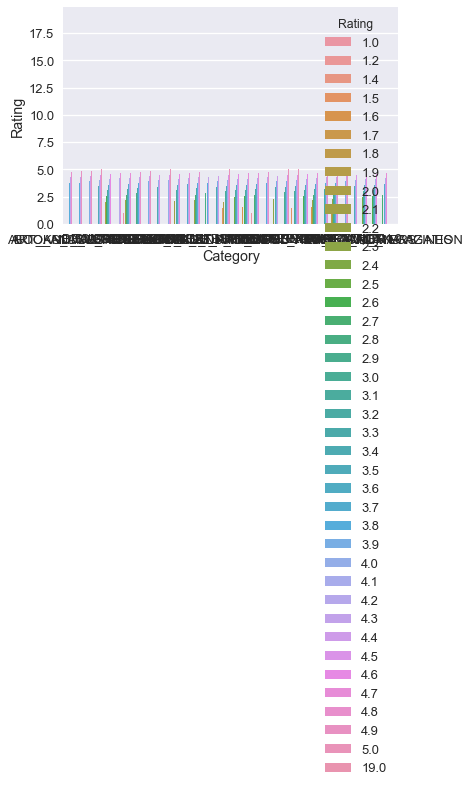

In [85]:
sns.barplot(x='Category', 
            y='Rating', 
            hue='Rating', 
            data=df);

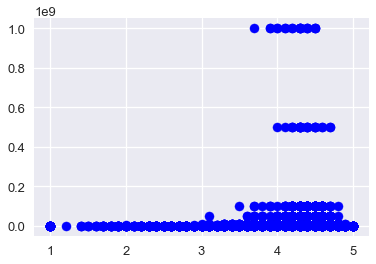

In [86]:
x = df['Rating']
y = df['Installs']
plt.scatter(x, y, c='blue')

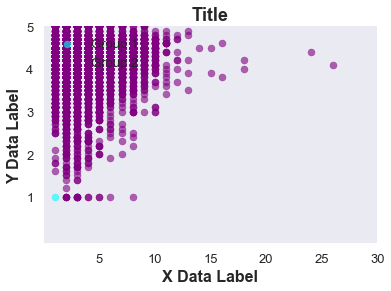

In [87]:
# Create a new figure
fig = plt.figure()
# Add an axes to our figureax = plt.axes()
ax = plt.axes()

x = df['Word Count']
y1 = df['Installs']
y2 = df['Rating']

# Plot the data again
ax.scatter(x, y1, c='cyan', alpha=0.6, label='Group 1', s=50)
plt.hold
ax.scatter(x, y2, c='purple', alpha=0.6, label='Group 2', s=50)
# Here we've added some more optional arguments. 
# alpha - sets the transparency of the data points
# label - makes a label for the data we've plotted, which can be used in the legend
# s - size. Changes the size of the dots we plot

# Add a title to our graph
plt.title('Title', fontsize=18, fontweight='bold')

# Add data labels
plt.xlabel('X Data Label', fontsize=16, fontweight='bold')
plt.ylabel('Y Data Label', fontsize=16, fontweight='bold')

# Set the ranges to plot of the x and y variables
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# Set the tick labels
ax.set_xticks(np.array([5,10,15,20,25,30]))
ax.set_yticks(np.array([1,2,3,4,5]))

# hide grid lines
ax.grid(False)

# Turn the top and right side lines off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick marks to only be on the bottom and the left. 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set linewidth of remaining spines
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add a legend. This will use the labels you defined when you set the data.
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
# Legend doesn't require any arguments. 
# Here we optionally specify where to put the legend ('loc'), how many points to use 
#  in the legend ('scatterpoints'), and wether to have a box around the legend ('frameon')

In [97]:
df_new = df.groupby('Category').mean()
df_new = df_new[1:]
df_new

,Rating,Installs,Word Count,Char Count
Category,,,,
ART_AND_DESIGN,4.36,1.87e+06,5.57,26.23
AUTO_AND_VEHICLES,4.19,7.28e+05,4.99,24.82
BEAUTY,4.28,6.41e+05,4.29,22.48
...,...,...,...,...
TRAVEL_AND_LOCAL,4.07,1.55e+07,4.02,20.91
VIDEO_PLAYERS,4.04,2.65e+07,3.86,19.36
WEATHER,4.24,5.02e+06,4.01,21.67


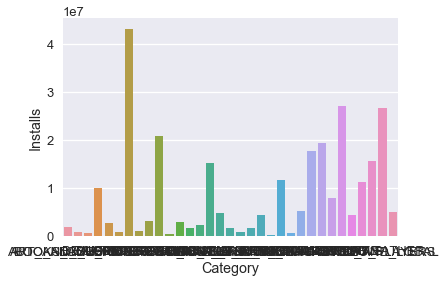

In [98]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

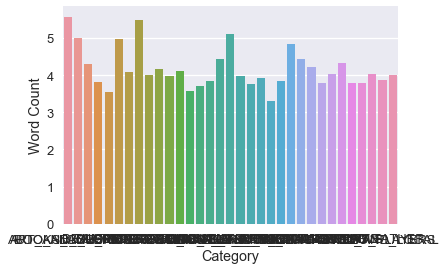

In [99]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Word Count', 
            data=df_new);

In [90]:
df_new = df.groupby('Category').count()
df_new = df_new[1:]
df_new

,App,Rating,Installs,Word Count,Char Count
Category,,,,,
ART_AND_DESIGN,61,61,61,61,61
AUTO_AND_VEHICLES,73,73,73,73,73
BEAUTY,42,42,42,42,42
...,...,...,...,...,...
TRAVEL_AND_LOCAL,187,187,187,187,187
VIDEO_PLAYERS,148,148,148,148,148
WEATHER,72,72,72,72,72


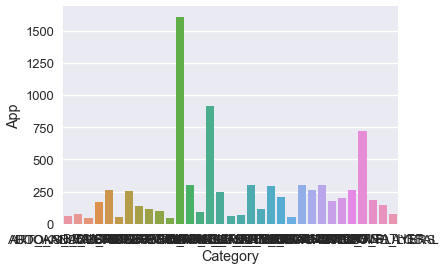

In [91]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='App', 
            data=df_new);

In [92]:
df_new = df.groupby('Word Count').mean()
df_new = df_new[1:]
df_new

,Rating,Installs,Char Count
Word Count,,,
2,4.09,1.08e+07,10.83
3,4.13,7.26e+06,16.08
4,4.18,4.43e+06,21.14
...,...,...,...
18,4.10,3.00e+05,93.50
24,4.40,1.00e+06,106.00
26,4.10,1.00e+06,169.00


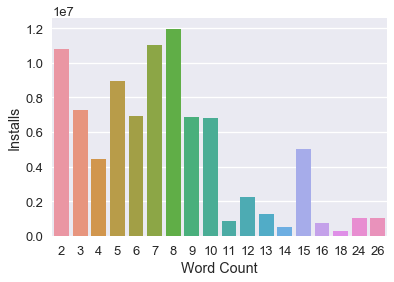

In [93]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

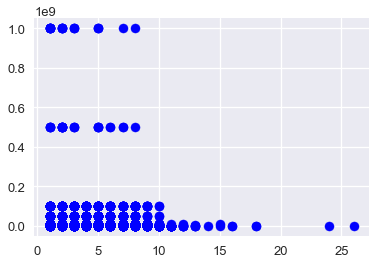

In [94]:
x = df['Word Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

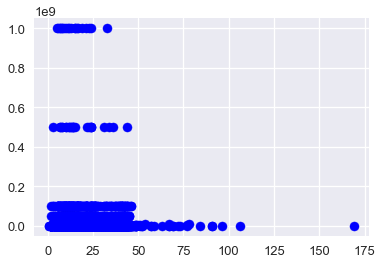

In [95]:
x = df['Char Count']
y = df['Installs']
plt.scatter(x, y, c='blue')